# Вопросы по первому семестру

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Матрицы" data-toc-modified-id="Матрицы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Матрицы</a></span></li><li><span><a href="#Сингулярное-разложение" data-toc-modified-id="Сингулярное-разложение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Сингулярное разложение</a></span></li><li><span><a href="#Число-обусловленности" data-toc-modified-id="Число-обусловленности-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Число обусловленности</a></span></li><li><span><a href="#Регуляризация" data-toc-modified-id="Регуляризация-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Регуляризация</a></span></li><li><span><a href="#Расстояние-Махаланобиса" data-toc-modified-id="Расстояние-Махаланобиса-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Расстояние Махаланобиса</a></span></li><li><span><a href="#Регрессия-L1" data-toc-modified-id="Регрессия-L1-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Регрессия L1</a></span><ul class="toc-item"><li><span><a href="#Норма-Ln" data-toc-modified-id="Норма-Ln-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Норма Ln</a></span></li></ul></li></ul></div>

In [1]:
# Imports
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [2]:
# Styles
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 4
cm = plt.cm.tab10  # Colormap

import seaborn
seaborn.set_style('whitegrid')

In [3]:
# import warnings
# warnings.filterwarnings('ignore')

# %config InlineBackend.figure_formats = ['pdf']
# %config Completer.use_jedi = False

---

## Матрицы

1. **Вопрос**: Как вычислить нормы Фробениуса матрицы через её сингулярные числа?\
   *Ответ*: Квадрат нормы Фробениуса равен сумме квадратов сингулярных чисел.\
    Квадрат нормы Фробениуса = следу матрицы $A^\top A$ = сумме квадратов сингулярных чисел.

---

## Сингулярное разложение

1. **Вопрос**: Как соотносятся собственные и сингулярные числа матрицы? \
   *Ответ*: В общем случае никак. \
   Но если $S$ &mdash; симметричная матрица, то $S = Q\Lambda Q^\top = U\Sigma V^\top$. \
   Если $S$ имеет отрицательные собственные числа ($S x = \lambda x$), то $\sigma = -\lambda$, а $u = -x$ или $v = -x$ (одно из двух). \
   Сингулярные числа симметричной матрицы равны модулю её собственных чисел: $\sigma_i = |\lambda_i|$.
   (Strang, p. 61)

1. **Вопрос**: Чему равны сингулярные числа ортогональной матрицы? \
   *Ответ*: Все сингулярные числа ортогональной матрицы равны 1 (вспомним геометрический смысл).

1. **Вопрос**: Рассмотрим матрицу $2 \times 2$. \
   В общем случае *4 разным элементам* (a, b, c, d) ставится в соответствие *4 геометрических параметра*: угол поворота ($\alpha$), два коэффициента растяжения ($\sigma_1, \sigma_2$), угол обратного поворота ($\beta$). \
   Но если матрица симметричная, то параметра уже 3 (a, b, b, d). Как в таком случае вычислить четвёрку ($\alpha$, $\sigma_1, \sigma_2$, $\beta$)? \
   *Ответ*: $\beta = -\alpha$. \
   (Strang, p. 62)
   
1. **Вопрос**: Какова связь между сингулярным и полярным разложением? \
   *Ответ*: $A = U \Sigma V^\top = (U V^\top)(V \Sigma V^\top) = Q S$ или $A = U \Sigma V^\top = (U \Sigma U^\top)(U V^\top) = K Q$. \
   (Strang, p. 67)
   
1. **Вопрос**: Какова связь между сингулярными числами и собственными числами матрицы $S$ в полярном разложении? \
   *Ответ*: Собственные числа $S$ &mdash; это сингулярные числа исходной матрицы $A$. \
   (Strang, p. 67)

---

## Число обусловленности

1. **Вопрос**: В рассматриваемом на лекции примере число обусловленности $\mu(A)=22.15$. Но выше мы нашли, что относительная погрешность увеличилась в $14.88$ раз. Почему так произошло? При каком условии оценка, сделанная по числу обусловленности, будет достигаться? \
   **Ответ**: Максимальная оценка будет достигаться, когда вектор $\mathbf{b}$ будет параллелен первому сингулярному вектору (первой главной компоненте). Минимальная &mdash; когда второму сингулярному вектору (см. иллюстрации ниже).

In [3]:
A = np.array([[1.0, 0.9],
              [1.0, 1.1]])

origin = [[0,0], [0,0]] # origin point

In [ ]:
def make_decor(ax, xlims=None, ylims=None):
    for axi in ax:
        axi.axhline(y=0, color='k')
        axi.axvline(x=0, color='k')
        axi.set_xlabel('$x_1$')
        axi.set_ylabel('$x_2$', rotation=0, ha='right')
        if(xlims):
            axi.set_xlim(xlims)
            axi.set_ylim(ylims)
        axi.set_aspect('equal')
        axi.set_axisbelow(True)

In [4]:
lmbd, U = LA.eig(A)
print('lambda = ', np.round(lmbd, 3))
print(round(lmbd[1]/lmbd[0], 4))

lambda =  [0.1 2. ]
20.0


In [5]:
U, sgm, Vt = LA.svd(A)
mu = sgm[0]/sgm[1]
print('sigma = ', np.round(sgm, 5))
print('mu(A) = ', round(mu, 5))

sigma =  [2.003 0.1  ]
mu(A) =  20.0501


In [57]:
# Creating vector b (3 variants)n
alpha = np.radians(45)
# b = np.atleast_2d([np.cos(alpha), np.sin(alpha)]).T  # 1
b = -np.atleast_2d(U[:,0]).T  # 2
# b = np.atleast_2d(U[:,1]).T  # 3
print('b:\n', b)

[[0.67082086]
 [0.74161943]]


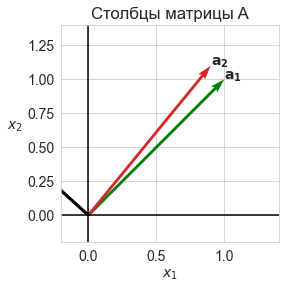

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plt.subplots_adjust(wspace=0.4)
make_decor([ax], [-0.2, 1.4], [-0.2, 1.4])

# Plotting A
ax.quiver(*origin, A[0,:], A[1,:], color=['g', cm(3)],
          width=0.013, angles='xy', scale_units='xy', scale=1)
ax.quiver(*origin, b[0,:], b[1,:], color=['k'],
          width=0.013, angles='xy', scale_units='xy', scale=1)
ax.set_title("Столбцы матрицы A")
ax.text(*A[:,0], "$\mathbf{a_1}$")
ax.text(*A[:,1], "$\mathbf{a_2}$")
ax.text(*b, "$\mathbf{b}$")

plt.show()

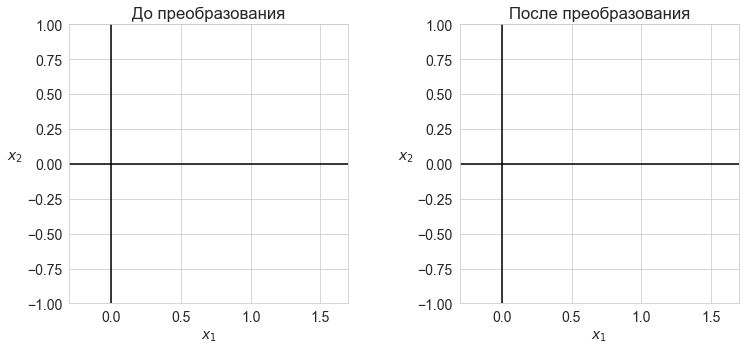

In [56]:
# Creating perturbed vectors B
n = 500
np.random.seed(42)
r = 0.1*np.random.rand(n)
phi = 2*np.pi*np.random.rand(n)
B1 = b[0] + r*np.cos(phi)
B2 = b[1] + r*np.sin(phi)
B = np.vstack((B1, B2))

In [15]:
# Solving system
A_inv = LA.inv(A)
x = A_inv @ b
print('x:\n', x)

X = A_inv @ B

Максимальное относительное увеличение возмущения max(dx/x : db/b) =  20.0501


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.subplots_adjust(wspace=0.4)
xlims = [-0.3, 1.7]
ylims = [-1.0, 1.0]
make_decor(ax, xlims, ylims)
# make_decor(ax)

# Plotting X
ax[0].plot(X[0,:], X[1,:], 'ro', ms=1.2, alpha=0.8)
ax[0].plot(x[0], x[1], 'kx', ms=10, mew=2)
ax[0].set_title("До преобразования")

# Plotting B
ax[1].plot(B[0, :], B[1, :], 'bo', ms=1.2, alpha=0.8)
ax[1].plot(b[0], b[1], 'rx', ms=10, mew=2)
ax[1].set_title("После преобразования")

plt.show()

In [ ]:
dx = X - x
db = B - b

k1 = np.array(list(map(LA.norm, db.T)))
k2 = np.array(list(map(LA.norm, dx.T)))

print(f'Максимальное увеличение возмущения max(dx/db) = {max(k2/k1):.5g}')

print(f'Норма вектора b = {LA.norm(b):.5g}')
print(f'Норма вектора x = {LA.norm(x):.5g}')

k1 = np.array(list(map(LA.norm, db.T))) / LA.norm(b)
k2 = np.array(list(map(LA.norm, dx.T))) / LA.norm(x)

print(f'Максимальное относительное увеличение возмущения max(dx/x : db/b) = {max(k2/k1):.5g}')

1. **Вопрос**: Если известен вектор $\mathbf{b}$, как сделать более точную оценку возрастания относительной погрешности? \
   **Ответ**: Оценка даётся по формуле
   $$ \frac{\|\delta \mathbf{x}\|}{\|\mathbf{x}\|} \le \frac{\|A^{-1}\| \|\mathbf{b}\|}{\|A^{-1} \mathbf{b}\|} \frac{\|\delta \mathbf{b}\|}{\|\mathbf{b}\|}. $$
   Величина $\nu(A, b) = \frac{\|A^{-1}\| \|\mathbf{b}\|}{\|A^{-1} \mathbf{b}\|}$ называется *числом обусловленности системы при заданной правой части* и показывает, во сколько раз может возрасти относительная погрешность решения по сравнению с погрешностью правой части при решении системы $A\mathbf{x} = \mathbf{b}$.

$$ \nu = \frac{1}{\sigma_1} \frac{\|\mathbf{b}\|}{\|\mathbf{x}\|}  $$

In [16]:
nu = 1 / sgm[1] * LA.norm(b) / LA.norm(x)
print('|b| = |Ax| = ', LA.norm(b))
print('|A|*|x| = ', sgm[0]*LA.norm(x))
print('nu = ', round(nu, 4))

|b| = |Ax| =  1.0999999999999999
|A|*|x| =  1.0999999999999992
nu =  20.0501


---

## Регуляризация

1. **Вопрос**: Для задачи, рассматриваемой выше, метод LASSO соответствует выбору одного из двух векторов, SVD &mdash; замене базиса из двух векторов на один, соответствующий максимальному сингулярному числу.
   Какая геометрическая интерпретация у гребневой регрессии?

**1. Обычное СЛАУ**

In [ ]:
print(x)

**2. OLS**

In [ ]:
print(A)
AtA = A.T @ A
print(AtA)
Atb = A.T @ b
print(Atb)

In [ ]:
lmbd, U = LA.eig(AtA)
# print(U)
# print(lmbd)

In [ ]:
AtA_root = U @ np.diag(lmbd**0.5) @ U.T
print(AtA_root)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plt.subplots_adjust(wspace=0.4)
make_decor([ax], [-0.2, 1.4], [-0.2, 1.4])
# make_decor([ax])

# Plotting A
ax.quiver(*origin, AtA_root[0,:], AtA_root[1,:], color=['g', cm(3)],
          width=0.013, angles='xy', scale_units='xy', scale=1)
ax.quiver(*origin, b[0,:], b[1,:], color=['k'],
          width=0.013, angles='xy', scale_units='xy', scale=1)
ax.set_title("Столбцы матрицы A")
ax.text(*AtA_root[:,0], "$\mathbf{a_1}$")
ax.text(*AtA_root[:,1], "$\mathbf{a_2}$")
ax.text(*b, "$\mathbf{b}$")

plt.show()

In [ ]:
x_OLS = LA.solve(AtA, A.T @ b)
print(x_OLS)

**3. Ridge**

In [ ]:
delta = 5e-1
AtA_ridge = AtA + delta**2*np.identity(2)
print(AtA_ridge)

In [ ]:
lmbd, U = LA.eig(AtA_ridge)
# print(U)
# print(lmbd)

In [ ]:
AtA_ridge_root = U @ np.diag(lmbd**0.5) @ U.T
print(A)
print(AtA_root)
print(AtA_ridge_root)

Обусловленности матриц

In [ ]:
print(LA.cond(A))
print(LA.cond(AtA))
print(LA.cond(AtA_ridge))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plt.subplots_adjust(wspace=0.4)
make_decor([ax], [-0.2, 1.4], [-0.2, 1.4])

# Plotting A
ax.quiver(*origin, AtA_ridge_root[0,:], AtA_ridge_root[1,:], color=['g', cm(3)],
          width=0.013, angles='xy', scale_units='xy', scale=1)
ax.quiver(*origin, b[0,:], b[1,:], color=['k'],
          width=0.013, angles='xy', scale_units='xy', scale=1)
ax.set_title("Столбцы матрицы A")
ax.text(*AtA_ridge_root[:,0], "$\mathbf{a_1}$")
ax.text(*AtA_ridge_root[:,1], "$\mathbf{a_2}$")
ax.text(*b, "$\mathbf{b}$")

plt.show()

In [ ]:
x_ridge = LA.solve(AtA_ridge, A.T @ b)
print(x)
print(x_OLS)
print(x_ridge)

In [ ]:
print(A@x)
print(A@x_OLS)
print(A@x_ridge)

In [ ]:
X = LA.solve(AtA_ridge, A.T @ B)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.subplots_adjust(wspace=0.4)
xlims = [-0.3, 1.7]
ylims = [-1.0, 1.0]
make_decor(ax, xlims, ylims)
make_decor(ax)

# Plotting X
ax[0].plot(X[0,:], X[1,:], 'ro', ms=1.2, alpha=0.8)
ax[0].plot(x_ridge[0], x_ridge[1], 'kx', ms=7, mew=1.5)
# ax[0].plot(x[0], x[1], 'kx', ms=10, mew=2)
ax[0].set_title("До преобразования")

# Plotting B
ax[1].plot(B[0, :], B[1, :], 'bo', ms=1.2, alpha=0.8)
ax[1].plot(b[0], b[1], 'rx', ms=10, mew=2)
ax[1].set_title("После преобразования")

plt.show()

In [ ]:
dx = X - x_ridge
db = B - b

k1 = np.array(list(map(LA.norm, db.T)))
k2 = np.array(list(map(LA.norm, dx.T)))

print(f'Максимальное увеличение возмущения max(dx/db) = {max(k2/k1):.5g}')

print(f'Норма вектора b = {LA.norm(b):.5g}')
print(f'Норма вектора x = {LA.norm(x_ridge):.5g}')

k1 = np.array(list(map(LA.norm, db.T))) / LA.norm(b)
k2 = np.array(list(map(LA.norm, dx.T))) / LA.norm(x_ridge)

print(f'Максимальное относительное увеличение возмущения max(dx/x : db/b) = {max(k2/k1):.5g}')

In [ ]:
U, sgm, Vt = LA.svd(A)
print(sgm)

In [ ]:
s1, s2 = sgm
m2 = ((s1**2 + delta**2)/s1) / ((s2**2 + delta**2)/s2) 
print(m2)

---

## Расстояние Махаланобиса

1. **Вопрос**: Рассмотрим набор точек, подчиняющийся многомерному нормальному распределению и образующий класс. Как вычислить расстояние от некоторых выбранных точек до &laquo;центра масс&raquo; класса?\
   **Ответ**: Сначала нужно преобразовать данные (привести эллиптическое облако к круглой форме), а затем посчитать обычное евклидово расстояние. В итоге получиться расстояние Махаланобиса (показать это).

---

## Регрессия L1

In [3]:
from scipy.optimize import minimize

In [29]:
# L1 optimization to reject outlier
def L1_norm(a, *args):
    x, b = args
    return np.linalg.norm(a*x-b, ord=1)

In [30]:
x = np.sort(4*(np.random.rand(25,1)-0.5),axis=0) # Random data from [-2,2]
b = 0.5*x + 0.1*np.random.randn(len(x),1)  # Line y = 0.5x with noise

b_out = b.copy()
b_out[-1] = -5 # Introduce outlier

In [31]:
aL1, aL2 = [0, 0], [0, 0]

res = np.linalg.lstsq(x,b,rcond=None)[0] # Least-squares slope (no outliers)
aL2[0] = res.item(0)

res = np.linalg.lstsq(x,b_out,rcond=None)[0] # New slope
aL2[1] = res.item(0)

In [32]:
print(aL2)

[0.47685195640066946, 0.14438377267092983]


In [38]:
a0 = aL2[0]   # initialize to L2 solution
res = minimize(L1_norm, a0, args=(x, b))
# print(res)
aL1[0] = res.x[0]  # aL1 is robust

res = minimize(L1_norm, a0, args=(x, b_out))
# print(res)
aL1[1] = res.x[0]  # aL1 is robust

In [39]:
print(aL2)
print(aL1)

[0.47685195640066946, 0.14438377267092983]
[0.47411297145951714, 0.46323540811746633]


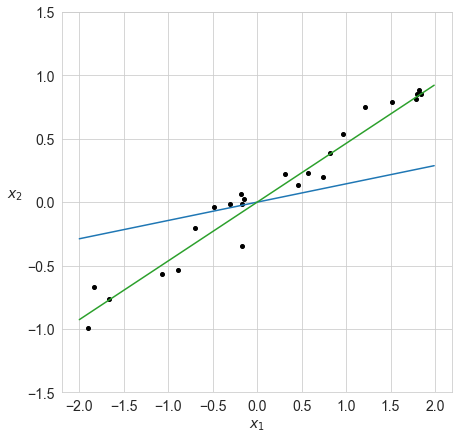

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))

# Plotting X
ax.plot(x[:-1],b[:-1],'ko')               # Data
ax.plot(x[-1],b_out[-1],'o',c=cm(3),ms=7) # Outlier

xgrid = np.arange(-2,2,0.01)
# ax.plot(xgrid,aL2[0]*xgrid,'k-')        # L2 fit (no outlier)
ax.plot(xgrid,aL2[1]*xgrid,'-',c=cm(0)) # L2 fit (outlier)
ax.plot(xgrid,aL1[1]*xgrid,'-',c=cm(2)) # L1 fit (outlier)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$', rotation=0, ha='right')
ax.set_ylim([-1.5, 1.5])
plt.show()

### Норма Ln

In [90]:
# Ln optimization to reject outlier
def Ln_norm(a, *args):
    x, b, n = args
    res = (a*x-b).flatten()
    return np.linalg.norm(res, ord=n)

In [110]:
n = 3
aLn = [0, 0]
a0 = aL2[0]   # initialize to L2 solution

res = minimize(Ln_norm, a0, args=(x, b_out, n))
# print(res)
aLn[1] = res.x[0]

In [111]:
print(aL2)
print(aL1)
print(aLn)

[0.47685195640066946, 0.14438377267092983]
[0.47411297145951714, 0.46323540811746633]
[0, -0.3661344301397036]


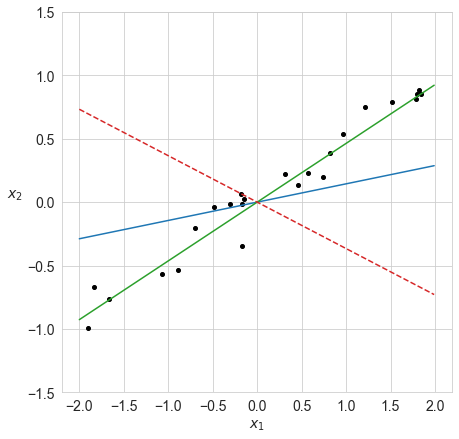

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))

# Plotting X
ax.plot(x[:-1],b[:-1],'ko')               # Data
ax.plot(x[-1],b_out[-1],'o',c=cm(3),ms=7) # Outlier

xgrid = np.arange(-2,2,0.01)
# ax.plot(xgrid,aL2[0]*xgrid,'k-')         # L2 fit (no outlier)
ax.plot(xgrid,aL2[1]*xgrid, '-',c=cm(0)) # L2 fit (outlier)
ax.plot(xgrid,aL1[1]*xgrid, '-',c=cm(2)) # L1 fit (outlier)
ax.plot(xgrid,aLn[1]*xgrid,'--',c=cm(3)) # Ln fit (outlier)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$', rotation=0, ha='right')
ax.set_ylim([-1.5, 1.5])
plt.show()